In [23]:
import os
from google.colab import drive
drive.mount('/content/drive')
# Add other folder names if necessary
os.chdir('/content/drive/My Drive/Code/Data')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [45]:
!pip3 install sentence_transformers

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 132.8/132.8 kB 3.5 MB/s eta 0:00:00


In [47]:
import pandas as pd
import os
import numpy as np

from sentence_transformers import SentenceTransformer

import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_curve, auc, precision_recall_curve, average_precision_score, f1_score

import tensorflow as tf
from tensorflow.keras import *
from tensorflow.keras.preprocessing import *
from tensorflow.keras.models import *
from tensorflow.keras.layers import *
from tensorflow.keras.callbacks import EarlyStopping
import keras.backend as K
from tensorflow.keras.utils import plot_model
import pickle

In [ ]:
# Google colab test code
device_name = tf.test.gpu_device_name()
if device_name != '/device:GPU:0':
  raise SystemError('GPU device not found')
print('Found GPU at: {}'.format(device_name))

Found GPU at: /device:GPU:0


In [41]:
def create_embeddings(text,model):
  model = SentenceTransformer(model)
  return model.encode(text)

In [43]:
BERT_model = 'paraphrase-multilingual-mpnet-base-v2'

## Note: for every data set there is a Test Results section, to see the results you can also skip to result and/or the plot section. There perpared data is loaded in; The final section of this notebook are Precision Recall Curves.

# Loading and Preparing the Data

In [ ]:
## Load in the model
trained_model_on_OS = load_model('4dilationsTCN.keras')

# Multiplicated vectors with Dutch model
trained_model_on_EDOS = load_model('EDosTCN.keras')

In [ ]:
# These were previously saved from this notebook, are placed here so you can easily skip to the test results part
with open('ALLDATASETYS.pkl', 'rb') as fp:
    Ys = pickle.load(fp)

OpenSubtitles_y = Ys[0]
Movies_y = Ys[1]
Friends_y = Ys[2]

OpenSubtitles_y = OpenSubtitles_y.reshape(OpenSubtitles_y.shape[0],1)
Movies_y = Movies_y.reshape(Movies_y.shape[0],1)
Friends_y = Friends_y.reshape(Friends_y.shape[0],1)

## OpenSubtitles

In [ ]:
# Load in previous dictionairy of dataframes, that need to be converterd to spark dataframes
with open('WTLOpenSubtitlesTestSet.pkl', 'rb') as fp:
    oTest = pickle.load(fp)

OpenSubtitles_y  = np.array(oTest.Y.tolist(),dtype=np.float32)

In [ ]:
%%time
# Create BERT embeddings for all sentences in the data
OpenSubitles_test_X = np.array(create_embeddings(oTest.Sentence.tolist(),BERT_model),dtype=np.float32)

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:88: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


.gitattributes:   0%|          | 0.00/690 [00:00<?, ?B/s]

1_Pooling/config.json:   0%|          | 0.00/190 [00:00<?, ?B/s]

README.md:   0%|          | 0.00/4.10k [00:00<?, ?B/s]

config.json:   0%|          | 0.00/723 [00:00<?, ?B/s]

config_sentence_transformers.json:   0%|          | 0.00/122 [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/1.11G [00:00<?, ?B/s]

sentence_bert_config.json:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

sentencepiece.bpe.model:   0%|          | 0.00/5.07M [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/239 [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/9.08M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/402 [00:00<?, ?B/s]

modules.json:   0%|          | 0.00/229 [00:00<?, ?B/s]

CPU times: user 9min 2s, sys: 16.6 s, total: 9min 18s
Wall time: 8min 52s


In [ ]:
text = oTest['NL translation'].astype(str).tolist()

In [ ]:
# Create embeddings for Dutch
%%time
# Create BERT embeddings for all sentences in the data
OpenSubs_test_X_Dutch = np.array(create_embeddings(text,BERT_model),dtype=np.float32)

CPU times: user 5h 46min 54s, sys: 40.2 s, total: 5h 47min 34s
Wall time: 5h 50min 2s


In [ ]:
# Save embeddings
#with open('OpenSubitles_test_X.pkl', 'wb') as fp:
 #   pickle.dump(OpenSubitles_test_X,fp)
  #  print('Saved')

Saved


In [ ]:
#with open('Dutch_OpenSubs_test_X.pkl', 'wb') as fp:
 #   pickle.dump(OpenSubs_test_X_Dutch,fp)
  #  print('Saved')

Saved


### OpenSubtitles Test Results

In [ ]:
# Load in embedding
with open('OpenSubitles_test_X.pkl', 'rb') as fp:
    OpenSubtitles_test_X = pickle.load(fp)

# Load in embedding
with open('Dutch_OpenSubs_test_X.pkl', 'rb') as fp:
    OpenSubs_test_X_Dutch = pickle.load(fp)

OpenSubtitles_test_X = OpenSubtitles_test_X.reshape(OpenSubtitles_test_X.shape[0],OpenSubtitles_test_X.shape[1],1)
OpenSubs_test_X_Dutch = OpenSubs_test_X_Dutch.reshape(OpenSubs_test_X_Dutch.shape[0],OpenSubs_test_X_Dutch.shape[1],1)

In [ ]:
%%time
OSresults = trained_model_on_OS.evaluate(OpenSubtitles_test_X,OpenSubtitles_y,return_dict=True)
OSresults

14330/14330 [==============================] - 59s 4ms/step - loss: 0.6791 - Accuracy: 0.5624 - precision: 0.5812 - recall: 0.6055 - f1_score: 0.6900
CPU times: user 58.8 s, sys: 9.46 s, total: 1min 8s
Wall time: 1min 1s


{'loss': 0.6790778636932373,
 'Accuracy': 0.5623912215232849,
 'precision': 0.5811874866485596,
 'recall': 0.6054553389549255,
 'f1_score': array([0.6899877], dtype=float32)}

In [ ]:
%%time
# Test results on Dutch
OSDresults = trained_model_on_OS.evaluate(OpenSubs_test_X_Dutch,OpenSubtitles_y,return_dict=True)
OSDresults

14330/14330 [==============================] - 55s 4ms/step - loss: 0.6806 - Accuracy: 0.5607 - precision: 0.5807 - recall: 0.5976 - f1_score: 0.6900
CPU times: user 56.2 s, sys: 9.46 s, total: 1min 5s
Wall time: 58.3 s


{'loss': 0.6805521249771118,
 'Accuracy': 0.560746967792511,
 'precision': 0.5806649923324585,
 'recall': 0.5975927710533142,
 'f1_score': array([0.6899877], dtype=float32)}

In [ ]:
# Create matrix multiplication embedding
OS_multemb = np.multiply(OpenSubtitles_test_X,OpenSubs_test_X_Dutch)

In [ ]:
%%time
# English-Dutch model, test on English Dutch OpenSubtitles test set
OSDresults = trained_model_on_EDOS.evaluate(OS_multemb,OpenSubtitles_y,return_dict=True)
OSDresults

14330/14330 [==============================] - 56s 4ms/step - loss: 0.6824 - Accuracy: 0.5526 - precision: 0.5784 - recall: 0.5554 - f1_score: 0.6900
CPU times: user 57.1 s, sys: 9.21 s, total: 1min 6s
Wall time: 58.8 s


{'loss': 0.6823616027832031,
 'Accuracy': 0.5525538921356201,
 'precision': 0.578353226184845,
 'recall': 0.5553650856018066,
 'f1_score': array([0.6899877], dtype=float32)}

In [ ]:
# For the plots (in the section after this)
os_y_hat = trained_model_on_OS.predict(OpenSubtitles_test_X)
os_y_hat_Dutch = trained_model_on_OS.predict(OpenSubs_test_X_Dutch)
os_y_hat_English_Dutch = trained_model_on_EDOS.predict(OS_multemb)
os_true_y = OpenSubtitles_y

os_y_hat_Dutch[:4],os_true_y[:4]

14330/14330 [==============================] - 37s 3ms/step


(array([[0.47754243],
        [0.41640347],
        [0.519079  ],
        [0.563127  ]], dtype=float32),
 array([[0.],
        [1.],
        [1.],
        [1.]], dtype=float32))

In [ ]:
print("Divisions, 0 and 1")
gt = np.unique(os_true_y, return_counts=True)[1]
ee = np.unique(np.round(os_y_hat), return_counts=True)[1]
ed = np.unique(np.round(os_y_hat_Dutch), return_counts=True)[1]
ted = np.unique(np.round(os_y_hat_English_Dutch), return_counts=True)[1]

print("Ground truth division 0 and 1",gt, "Percentage 0s of total",(100*gt[0])/len(os_true_y), "Percentage 1s of total",(100*gt[1])/len(os_true_y))
print("Predicted on English, trained on English 0 and 1",ee, "Percentage 0s of total",(100*ee[0])/len(os_true_y), "Percentage 1s of total",(100*ee[1])/len(os_true_y))
print("Predicted on Dutch, trained on English 0 and 1",ed, "Percentage 0s of total",(100*ed[0])/len(os_true_y), "Percentage 1s of total",(100*ed[1])/len(os_true_y))
print("Predicted on English-Dutch, trained on English-Dutch 0 and 1",ted, "Percentage 0s of total",(100*ted[0])/len(os_true_y), "Percentage 1s of total",(100*ted[1])/len(os_true_y))

Divisions, 0 and 1
Ground truth division 0 and 1 [217034 241524] Percentage 0s of total 47.32967258231238 Percentage 1s of total 52.67032741768762
Predicted on English, trained on English 0 and 1 [206949 251609] Percentage 0s of total 45.13038699575626 Percentage 1s of total 54.86961300424374
Predicted on Dutch, trained on English 0 and 1 [209993 248565] Percentage 0s of total 45.79420705777677 Percentage 1s of total 54.20579294222323
Predicted on English-Dutch, trained on English-Dutch 0 and 1 [226634 231924] Percentage 0s of total 49.42319183178573 Percentage 1s of total 50.57680816821427


In [ ]:
## Save plot inputs
#with open('OSpredYsforplot.pkl', 'wb') as fp:
#    pickle.dump([os_y_hat, os_y_hat_Dutch, os_y_hat_English_Dutch, os_true_y],fp)
#    print('Saved')

Saved


## Cornell Corpus

In [24]:
cd '../EXTRA DATASET'

/content/drive/My Drive/Code/EXTRA DATASET


In [9]:
# Load in previous dictionairy of dataframes
with open('processedDS2concattedframe.pkl', 'rb') as fp:
    movies = pickle.load(fp)

Movies_y  = np.array(movies.Y.tolist(),dtype=np.float32)

In [ ]:
%%time
# Create BERT embeddings for all sentences in the data
Movies_test_X = np.array(create_embeddings(movies.text.tolist(),BERT_model),dtype=np.float32)

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:88: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


.gitattributes:   0%|          | 0.00/690 [00:00<?, ?B/s]

1_Pooling/config.json:   0%|          | 0.00/190 [00:00<?, ?B/s]

README.md:   0%|          | 0.00/4.10k [00:00<?, ?B/s]

config.json:   0%|          | 0.00/723 [00:00<?, ?B/s]

config_sentence_transformers.json:   0%|          | 0.00/122 [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/1.11G [00:00<?, ?B/s]

sentence_bert_config.json:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

sentencepiece.bpe.model:   0%|          | 0.00/5.07M [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/239 [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/9.08M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/402 [00:00<?, ?B/s]

modules.json:   0%|          | 0.00/229 [00:00<?, ?B/s]

CPU times: user 6min 24s, sys: 7.44 s, total: 6min 32s
Wall time: 7min 21s


In [ ]:
# Load in previous dictionairy of dataframes
with open('processedDS2sparks.pkl', 'rb') as fp:
    movies = pickle.load(fp)

In [25]:
cd ..

/content/drive/My Drive/Code


In [26]:
cd 'Data/translations/DS2andDS3 translations'

/content/drive/My Drive/Code/Data/translations/DS2andDS3 translations


In [ ]:
# Retrieve all file names
names = os.listdir()
print(names)

['DS2localtranslations(2).pkl', 'GPDS2translations13 (2).pkl', 'GPDS2translations12 (1).pkl', 'GPDS2translations11 (2).pkl', 'GPDS2translations10 (2).pkl', 'GPDS2translations (2).pkl', 'NewDS2localtranslations2 (1).pkl', 'DS2localtranslations (1).pkl', 'DS2lllocaltranslations16.pkl', 'DS2lllocaltranslations17.pkl', 'DS2lllocaltranslations18.pkl', 'DS2lllocaltranslations20.pkl', 'DS2lllocaltranslations21.pkl', 'DS2lllocaltranslations24.pkl', 'DS2lllocaltranslations25.pkl', 'DS2lllocaltranslations27.pkl', 'DS2lllocaltranslations28.pkl', 'DS2NEWMOREgtranslations84.pkl', 'DS2NEWMOREgtranslations85.pkl', 'DS2NEWMOREgtranslations86.pkl', 'DS2NEWMOREgtranslations87.pkl', 'DS2NEWMOREgtranslations88.pkl', 'DS2NEWMOREgtranslations89.pkl', 'FRIENDSGPDS2translations4.pkl', 'GPDS2translations.pkl', 'GPDS2translations(1).pkl', 'GPDS2translations11.pkl', 'GPDS2translations12.pkl', 'GPDS2translations13.pkl', 'GPDS2translations13(1).pkl', 'GPDS2translations12(1).pkl', 'GPDS2translations11(1).pkl', 'DS2

In [ ]:
# Get all names of all translated movie corpus files
translations = []
for name in names:
    if 'DS2' in name and 'FRIENDS' not in name and 'processed' not in name:
        with open(name,'rb') as fp:
            translations.append(pickle.load(fp))

In [ ]:
# Create one dictionairy of all frames from all separate dictionaries of frames
new_movies = {}

for d in translations:
    for key in list(d.keys()):
        new_movies[key] = d[key]

diff =set(movies.keys()) - set(new_movies.keys())
len(movies),len(diff),len(new_movies)

(609, 0, 609)

In [ ]:
frames = [new_movies[key] for key in new_movies.keys()]

In [ ]:
%%time
# Create one concattenated frame of alle separate frames of movies
movies_concat_frame = pd.DataFrame()
for frame in frames:
  movies_concat_frame = pd.concat([movies_concat_frame,frame],ignore_index=True)

movies_concat_frame

CPU times: user 10.4 s, sys: 160 ms, total: 10.5 s
Wall time: 10.6 s


,id,conversation_id,text,speaker,movie_id,Next Speaker,Y,Sentence Length,NL translation
0,L422325,L422321,You can't stop what's comin. Ain't all waitin'...,u2355,m151,u2355,0,10,Je kunt niet stoppen wat er gaat gebeuren. Het...
1,L422324,L422321,I'm... discouraged.,u2350,m151,u2355,1,2,Ik ben... ontmoedigd.
2,L422323,L422321,You're discouraged.,u2355,m151,u2350,1,2,Je bent ontmoedigd.
3,L422322,L422321,Most don't.,u2350,m151,u2355,1,2,De meesten niet.
4,L422321,L422321,...What you got ain't nothin' new. This countr...,u2355,m151,u2350,1,29,...Wat je hebt is niets nieuws. Dit land is ha...
...,...,...,...,...,...,...,...,...,...
300688,L666371,L666369,Lord Chelmsford seems to want me to stay back ...,u9030,m616,u9034,1,12,Lord Chelmsford lijkt te willen dat ik bij mij...
300689,L666370,L666369,I'm to take the Sikali with the main column to...,u9034,m616,u9030,1,12,Ik moet de Sikali met de hoofdkolom naar de ri...
300690,L666369,L666369,"Your orders, Mr Vereker?",u9030,m616,u9034,1,4,"Uw orders, meneer Vereker?"
300691,L666257,L666256,"Good ones, yes, Mr Vereker. Gentlemen who can ...",u9030,m616,u9030,0,11,"Goede, ja, meneer Vereker. Heren die kunnen ri..."


In [ ]:
%%time
# Create BERT embeddings for all sentences in the data
movies_test_X_Dutch = np.array(create_embeddings(movies_concat_frame['NL translation'].astype(str).tolist(),BERT_model),dtype=np.float32)

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:88: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


.gitattributes:   0%|          | 0.00/690 [00:00<?, ?B/s]

1_Pooling/config.json:   0%|          | 0.00/190 [00:00<?, ?B/s]

README.md:   0%|          | 0.00/4.10k [00:00<?, ?B/s]

config.json:   0%|          | 0.00/723 [00:00<?, ?B/s]

config_sentence_transformers.json:   0%|          | 0.00/122 [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/1.11G [00:00<?, ?B/s]

sentence_bert_config.json:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

sentencepiece.bpe.model:   0%|          | 0.00/5.07M [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/239 [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/9.08M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/402 [00:00<?, ?B/s]

modules.json:   0%|          | 0.00/229 [00:00<?, ?B/s]

CPU times: user 6min 51s, sys: 7.17 s, total: 6min 58s
Wall time: 7min 7s


In [27]:
cd ../..

/content/drive/MyDrive/Code/Data


In [ ]:
# Save embeddings
#with open('Movies_test_X.pkl', 'wb') as fp:
 #   pickle.dump(Movies_test_X,fp)
  #  print('Saved')

In [ ]:
#with open('Dutch_Movies_test_X.pkl', 'wb') as fp:
 #   pickle.dump(movies_test_X_Dutch,fp)
  #  print('Saved')

Saved


### Cornell Corpus Test Results

In [ ]:
with open('Movies_test_X.pkl', 'rb') as fp:
    Movies_test_X = pickle.load(fp)

with open('Dutch_Movies_test_X.pkl', 'rb') as fp:
    Movies_test_X_Dutch = pickle.load(fp)

Movies_test_X = Movies_test_X.reshape(Movies_test_X.shape[0],Movies_test_X.shape[1],1)
Movies_test_X_Dutch = Movies_test_X_Dutch.reshape(Movies_test_X_Dutch.shape[0],Movies_test_X_Dutch.shape[1],1)

In [ ]:
%%time
CCresults = trained_model_on_OS.evaluate(Movies_test_X,Movies_y,return_dict=True)
CCresults

9397/9397 [==============================] - 39s 4ms/step - loss: 0.6693 - Accuracy: 0.5854 - precision: 0.8916 - recall: 0.6043 - f1_score: 0.9383
CPU times: user 40.7 s, sys: 6.5 s, total: 47.2 s
Wall time: 40.7 s


{'loss': 0.6692549586296082,
 'Accuracy': 0.5853644609451294,
 'precision': 0.8915658593177795,
 'recall': 0.6043447256088257,
 'f1_score': array([0.93830967], dtype=float32)}

In [ ]:
%%time
# Test results on Dutch
CCDresults = trained_model_on_OS.evaluate(Movies_test_X_Dutch,Movies_y,return_dict=True)
CCDresults

9397/9397 [==============================] - 38s 4ms/step - loss: 0.6793 - Accuracy: 0.5656 - precision: 0.8838 - recall: 0.5854 - f1_score: 0.9383
CPU times: user 40.3 s, sys: 6.46 s, total: 46.8 s
Wall time: 40.1 s


{'loss': 0.6793149709701538,
 'Accuracy': 0.5655568838119507,
 'precision': 0.8837905526161194,
 'recall': 0.5854057669639587,
 'f1_score': array([0.93830967], dtype=float32)}

In [ ]:
# Create matrix multiplication embedding
Movies_multemb = np.multiply(Movies_test_X,Movies_test_X_Dutch)

In [ ]:

%%time
# English-Dutch model, test on English Dutch OpenSubtitles test set
CCDresults = trained_model_on_EDOS.evaluate(Movies_multemb,Movies_y,return_dict=True)
CCDresults

9397/9397 [==============================] - 38s 4ms/step - loss: 0.6597 - Accuracy: 0.6536 - precision: 0.8879 - recall: 0.6959 - f1_score: 0.9383
CPU times: user 40.5 s, sys: 6.31 s, total: 46.8 s
Wall time: 40.2 s


{'loss': 0.6596933603286743,
 'Accuracy': 0.6535868644714355,
 'precision': 0.8878753781318665,
 'recall': 0.6959198117256165,
 'f1_score': array([0.93830967], dtype=float32)}

In [ ]:
%%time
# This is for the PR plots (after this section)
cc_y_hat = trained_model_on_OS.predict(Movies_test_X)
cc_y_hat_Dutch = trained_model_on_OS.predict(Movies_test_X_Dutch)
CC_y_hat_English_Dutch = trained_model_on_EDOS.predict(Movies_multemb)

cc_true_y = Movies_y

cc_y_hat_Dutch[:4],cc_true_y[:4]

9397/9397 [==============================] - 26s 3ms/step
CPU times: user 1min 37s, sys: 9.26 s, total: 1min 47s
Wall time: 1min 35s


(array([[0.4013488 ],
        [0.51824903],
        [0.54658955],
        [0.5436561 ]], dtype=float32),
 array([[0.],
        [1.],
        [1.],
        [1.]], dtype=float32))

In [ ]:
print("Divisions, 0 and 1")
gt = np.unique(cc_true_y, return_counts=True)[1]
ee = np.unique(np.round(cc_y_hat), return_counts=True)[1]
ed = np.unique(np.round(cc_y_hat_Dutch), return_counts=True)[1]
ted = np.unique(np.round(cc_y_hat_English_Dutch), return_counts=True)[1]

print("Ground truth division 0 and 1",gt, "Percentage 0s of total",(100*gt[0])/len(cc_true_y), "Percentage 1s of total",(100*gt[1])/len(cc_true_y))
print("Predicted on English, trained on English 0 and 1",ee, "Percentage 0s of total",(100*ee[0])/len(cc_true_y), "Percentage 1s of total",(100*ee[1])/len(cc_true_y))
print("Predicted on Dutch, trained on English 0 and 1",ed, "Percentage 0s of total",(100*ed[0])/len(cc_true_y), "Percentage 1s of total",(100*ed[1])/len(cc_true_y))
print("Predicted on English-Dutch, trained on English-Dutch 0 and 1",ted, "Percentage 0s of total",(100*ted[0])/len(cc_true_y), "Percentage 1s of total",(100*ted[1])/len(cc_true_y))

Divisions, 0 and 1
Ground truth division 0 and 1 [ 34944 265749] Percentage 0s of total 11.621155131645898 Percentage 1s of total 88.37884486835411
Predicted on English, trained on English 0 and 1 [120556 180137] Percentage 0s of total 40.092719152092 Percentage 1s of total 59.907280847908
Predicted on Dutch, trained on English 0 and 1 [124666 176027] Percentage 0s of total 41.45956174570077 Percentage 1s of total 58.54043825429923
Predicted on English-Dutch, trained on English-Dutch 0 and 1 [ 92398 208295] Percentage 0s of total 30.728350842886265 Percentage 1s of total 69.27164915711373


In [35]:
#with open('Moviesysforplot.pkl', 'wb') as fp:
#    pickle.dump([cc_y_hat,cc_y_hat_Dutch,CC_y_hat_English_Dutch,cc_true_y],fp)
#    print('Saved')

Saved


## Friends Corpus

In [37]:
cd ..

/content/drive/MyDrive/Code


In [38]:
cd 'EXTRA DATASET'

/content/drive/MyDrive/Code/EXTRA DATASET


In [39]:
# Load in previous dictionairy of dataframes, that need to be converterd to spark dataframes
with open('friendsconcattedframe.pkl', 'rb') as fp:
    friendsTest = pickle.load(fp)

Friends_y  = np.array(friendsTest.Y.tolist(),dtype=np.float32)


In [48]:
%%time
# Create BERT embeddings for all sentences in the Friends data set
Friends_test_X = np.array(create_embeddings(friendsTest.text.tolist(),BERT_model),dtype=np.float32)

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:88: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


modules.json:   0%|          | 0.00/229 [00:00<?, ?B/s]

config_sentence_transformers.json:   0%|          | 0.00/122 [00:00<?, ?B/s]

README.md:   0%|          | 0.00/4.10k [00:00<?, ?B/s]

sentence_bert_config.json:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/723 [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/1.11G [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/402 [00:00<?, ?B/s]

sentencepiece.bpe.model:   0%|          | 0.00/5.07M [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/9.08M [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/239 [00:00<?, ?B/s]

1_Pooling/config.json:   0%|          | 0.00/190 [00:00<?, ?B/s]

CPU times: user 1min 35s, sys: 5.19 s, total: 1min 40s
Wall time: 1min 53s


In [53]:
cd '../Data'

/content/drive/MyDrive/Code/Data


In [ ]:
# Save embeddings
#with open('Friends_test_X.pkl', 'wb') as fp:
#    pickle.dump(Friends_test_X,fp)
#    print('Saved')

Saved


In [57]:
cd 'translations/DS2andDS3 translations'

/content/drive/MyDrive/Code/Data/translations/DS2andDS3 translations


In [ ]:
# Retrieve file names
names = os.listdir()
print(names)

['PDS2lllocaltranslations.pkl', 'PDS2lllocaltranslations2.pkl', 'friendssparks.pkl', 'FRIENDSPDS2lllocaltranslations2.pkl', 'FRIENDSPDS2lllocaltranslations3.pkl', 'FRIENDSGPDS2translations.pkl', 'FRIENDSPDS2lllocaltranslations4.pkl', 'FRIENDSGPDS2translations2.pkl', 'FRIENDSPDS2lllocaltranslations5.pkl', 'FRIENDSPDS2lllocaltranslations6.pkl', 'FRIENDSGPDS2translations3.pkl', 'FRIENDSGPDS2translations4.pkl', 'DS2lllocaltranslations3.pkl', 'DS2localtranslations(1).pkl', 'DS2lllocaltranslations4.pkl', 'DS2lllocaltranslations5.pkl', 'DS2lllocaltranslations6.pkl', 'NewDS2localtranslations2(1).pkl', 'DS2lllocaltranslations7.pkl', 'GPDS2translations(1).pkl', 'GPDS2translations10(1).pkl', 'GPDS2translations11(1).pkl', 'GPDS2translations12(1).pkl', 'GPDS2translations13(1).pkl', 'GPDS2translations13.pkl', 'GPDS2translations12.pkl', 'GPDS2translations11.pkl', 'GPDS2translations10.pkl', 'GPDS2translations.pkl', 'NewDS2localtranslations2.pkl', 'DS2localtranslations.pkl', 'DS2lllocaltranslations8.pk

In [ ]:
# Create one dictionairy of all frames from all separate dictionaries of frames
translations = {}
for translation in names:
  if len(translation.split('.')) > 1 and translation.split('.')[1] == 'pkl' and 'FRIENDS' in translation:
    with open(translation, 'rb') as fp:
      transdict = pickle.load(fp)
    keys = list(transdict.keys())
    lens+= len(transdict)
    for key in keys:
      translations[key] = transdict[key]

lens,len(translations)

(236, 236)

In [ ]:
frames = [translations[key] for key in translations.keys()]
frames[0]

,text,speaker,Season,Episode,Season_Episode,Next Speaker of,Y,Sentence Length,NL translation
0,There's nothing to tell! He's just some guy I ...,Monica Geller,s01,e01,"[s01, e01]",Monica Geller,0,11,Er valt niets te vertellen! Hij is gewoon iema...
1,"C'mon, you're going out with the guy! There's ...",Joey Tribbiani,s01,e01,"[s01, e01]",Monica Geller,1,14,"Kom op, je gaat uit met die man! Er moet iets ..."
2,"All right Joey, be nice. So does he have a hum...",Chandler Bing,s01,e01,"[s01, e01]",Joey Tribbiani,1,16,"Oké Joey, wees aardig. Heeft hij dan een bult?..."
3,"Wait, does he eat chalk?",Phoebe Buffay,s01,e01,"[s01, e01]",Chandler Bing,1,5,"Wacht, eet hij krijt?"
4,"Just, 'cause, I don't want her to go through w...",Phoebe Buffay,s01,e01,"[s01, e01]",Phoebe Buffay,0,16,"Gewoon, omdat ik niet wil dat ze meemaakt wat ..."
...,...,...,...,...,...,...,...,...,...
295,"Yeah. Yeah, I'll have a cup of coffee.",#ALL#,s01,e01,"[s01, e01]",Rachel Green,1,8,"Ja. Ja, ik neem wel een kop koffie."
296,"Kids, new dream... I'm in Las Vegas.",Chandler Bing,s01,e01,"[s01, e01]",#ALL#,1,7,"Kinderen, nieuwe droom... Ik ben in Las Vegas."
297,"Ahh, miss? More coffee?",Customer,s01,e01,"[s01, e01]",Chandler Bing,1,4,"Ah, mevrouw? Meer koffie?"
298,"Ugh. Excuse me, could you give this to that gu...",Rachel Green,s01,e01,"[s01, e01]",Customer,1,20,"Uhm. Pardon, kunt u dit aan die kerel daar gev..."


In [ ]:
# Create one concattenated frame of alle separate frames (subtitle files of series and movies)
friends_concat_frame = pd.DataFrame()
for frame in frames:
  friends_concat_frame = pd.concat([friends_concat_frame,frame],ignore_index=True)

friends_concat_frame

,text,speaker,Season,Episode,Season_Episode,Next Speaker of,Y,Sentence Length,NL translation,Next Speaker
0,There's nothing to tell! He's just some guy I ...,Monica Geller,s01,e01,"[s01, e01]",Monica Geller,0,11,Er valt niets te vertellen! Hij is gewoon iema...,NaN
1,"C'mon, you're going out with the guy! There's ...",Joey Tribbiani,s01,e01,"[s01, e01]",Monica Geller,1,14,"Kom op, je gaat uit met die man! Er moet iets ...",NaN
2,"All right Joey, be nice. So does he have a hum...",Chandler Bing,s01,e01,"[s01, e01]",Joey Tribbiani,1,16,"Oké Joey, wees aardig. Heeft hij dan een bult?...",NaN
3,"Wait, does he eat chalk?",Phoebe Buffay,s01,e01,"[s01, e01]",Chandler Bing,1,5,"Wacht, eet hij krijt?",NaN
4,"Just, 'cause, I don't want her to go through w...",Phoebe Buffay,s01,e01,"[s01, e01]",Phoebe Buffay,0,16,"Gewoon, omdat ik niet wil dat ze meemaakt wat ...",NaN
...,...,...,...,...,...,...,...,...,...,...
61302,"Oh, it's gonna be okay.",Chandler Bing,s10,e18,"[s10, e18]",Monica Geller,1,5,Het komt goed.,NaN
61303,Do you guys have to go to the new house right ...,Rachel Green,s10,e18,"[s10, e18]",Chandler Bing,1,18,"Moeten jullie meteen naar het nieuwe huis, of ...",NaN
61304,We got some time.,Monica Geller,s10,e18,"[s10, e18]",Rachel Green,1,4,We hebben wat tijd.,NaN
61305,"Okay, should we get some coffee?",Rachel Green,s10,e18,"[s10, e18]",Monica Geller,1,6,"Oké, zullen we wat koffie halen?",NaN


In [58]:
cd ../..

/content/drive/MyDrive/Code/Data


In [ ]:
%%time
# Create BERT embeddings for all sentences in the data
Friends_test_X_Dutch = np.array(create_embeddings(friends_concat_frame['NL translation'].tolist(),BERT_model),dtype=np.float32)

CPU times: user 1min 27s, sys: 1.89 s, total: 1min 29s
Wall time: 1min 34s


In [ ]:
# Load in previous dictionairy of dataframes, that need to be converterd to spark dataframes
#with open('Dutch_Friends_test_X.pkl', 'wb') as fp:
#    pickle.dump(Friends_test_X_Dutch,fp)
#    print('Saved')

Saved


In [ ]:
# Save all labels
#with open('ALLDATASETYS.pkl', 'wb') as fp:
#    pickle.dump([OpenSubtitles_y,Movies_y,Friends_y],fp)
#    print('Saved')

Saved


### Friends Test Results

In [ ]:
with open('Friends_test_X.pkl', 'rb') as fp:
    Friends_test_X = pickle.load(fp)

with open('Dutch_Friends_test_X.pkl', 'rb') as fp:
    Friends_test_X_Dutch = pickle.load(fp)

Friends_test_X = Friends_test_X.reshape(Friends_test_X.shape[0],Friends_test_X.shape[1],1)
Friends_test_X_Dutch = Friends_test_X_Dutch.reshape(Friends_test_X_Dutch.shape[0],Friends_test_X_Dutch.shape[1],1)

In [ ]:
%%time
Fresults = trained_model_on_OS.evaluate(Friends_test_X,Friends_y,return_dict=True)
Fresults

1916/1916 [==============================] - 12s 4ms/step - loss: 0.6272 - Accuracy: 0.7407 - precision: 0.9770 - recall: 0.7524 - f1_score: 0.9885
CPU times: user 11.1 s, sys: 1.62 s, total: 12.7 s
Wall time: 12.6 s


{'loss': 0.6272041201591492,
 'Accuracy': 0.7406984567642212,
 'precision': 0.9769830703735352,
 'recall': 0.75239098072052,
 'f1_score': array([0.98850024], dtype=float32)}

In [ ]:
%%time
# Test results on Dutch
FDresults = trained_model_on_OS.evaluate(Friends_test_X_Dutch,Friends_y,return_dict=True)
FDresults

1916/1916 [==============================] - 8s 4ms/step - loss: 0.6370 - Accuracy: 0.7301 - precision: 0.9774 - recall: 0.7409 - f1_score: 0.9885
CPU times: user 8.3 s, sys: 1.29 s, total: 9.59 s
Wall time: 8.28 s


{'loss': 0.6369789242744446,
 'Accuracy': 0.7300797700881958,
 'precision': 0.977388322353363,
 'recall': 0.740941047668457,
 'f1_score': array([0.98850024], dtype=float32)}

In [ ]:
# Create matrix multiplication embedding
Friends_multemb = np.multiply(Friends_test_X,Friends_test_X_Dutch)

In [ ]:
%%time
# English-Dutch model, test on English Dutch OpenSubtitles test set
FDresults = trained_model_on_EDOS.evaluate(Friends_multemb,Friends_y,return_dict=True)
FDresults

1916/1916 [==============================] - 9s 4ms/step - loss: 0.6305 - Accuracy: 0.7513 - precision: 0.9772 - recall: 0.7633 - f1_score: 0.9885
CPU times: user 9.21 s, sys: 1.38 s, total: 10.6 s
Wall time: 9.09 s


{'loss': 0.6304999589920044,
 'Accuracy': 0.7512518763542175,
 'precision': 0.977199375629425,
 'recall': 0.7632734179496765,
 'f1_score': array([0.98850024], dtype=float32)}

In [ ]:
# For the plots after this section
fy_hat = trained_model_on_OS.predict(Friends_test_X)
fy_hat_Dutch = trained_model_on_OS.predict(Friends_test_X_Dutch)
fy_hat_English_Dutch = trained_model_on_EDOS.predict(Friends_multemb)
true_fy = Friends_y

fy_hat_Dutch[:4],true_fy[:4]

1916/1916 [==============================] - 5s 3ms/step


(array([[0.49196827],
        [0.54473054],
        [0.61677635],
        [0.59176254]], dtype=float32),
 array([[0.],
        [1.],
        [1.],
        [1.]], dtype=float32))

In [ ]:
print("Divisions, 0 and 1")
gt = np.unique(true_fy, return_counts=True)[1]
ee = np.unique(np.round(fy_hat), return_counts=True)[1]
ed = np.unique(np.round(fy_hat_Dutch), return_counts=True)[1]
ted = np.unique(np.round(fy_hat_English_Dutch), return_counts=True)[1]

print("Ground truth division 0 and 1",gt, "Percentage 0s of total",(100*gt[0])/len(true_fy), "Percentage 1s of total",(100*gt[1])/len(true_fy))
print("Predicted on English, trained on English 0 and 1",ee, "Percentage 0s of total",(100*ee[0])/len(true_fy), "Percentage 1s of total",(100*ee[1])/len(true_fy))
print("Predicted on Dutch, trained on English 0 and 1",ed, "Percentage 0s of total",(100*ed[0])/len(true_fy), "Percentage 1s of total",(100*ed[1])/len(true_fy))
print("Predicted on English-Dutch, trained on English-Dutch 0 and 1",ted, "Percentage 0s of total",(100*ted[0])/len(true_fy), "Percentage 1s of total",(100*ted[1])/len(true_fy))

Divisions, 0 and 1
Ground truth division 0 and 1 [ 1394 59913] Percentage 0s of total 2.2738023390477435 Percentage 1s of total 97.72619766095225
Predicted on English, trained on English 0 and 1 [15167 46140] Percentage 0s of total 24.739426166669386 Percentage 1s of total 75.26057383333061
Predicted on Dutch, trained on English 0 and 1 [15888 45419] Percentage 0s of total 25.91547457875936 Percentage 1s of total 74.08452542124064
Predicted on English-Dutch, trained on English-Dutch 0 and 1 [14510 46797] Percentage 0s of total 23.66777040142235 Percentage 1s of total 76.33222959857765


In [ ]:
# Save predicted Ys
#with open('Friendsys.pkl', 'wb') as fp:
#    pickle.dump([fy_hat,fy_hat_Dutch,fy_hat_English_Dutch,true_fy],fp)
#    print('Saved')

Saved


## Precision Recall Curves

### Loading in Data

In [59]:
# Load label inputs
with open('OSpredYsforplot.pkl', 'rb') as fp:
    os_y_hat, os_y_hat_Dutch, os_y_hat_English_Dutch, os_true_y = pickle.load(fp)

with open('Moviesysforplot.pkl', 'rb') as fp:
  cc_y_hat,cc_y_hat_Dutch,cc_y_hat_English_Dutch,cc_true_y = pickle.load(fp)

# Load label inputs
with open('Friendsys.pkl', 'rb') as fp:
    fy_hat,fy_hat_Dutch,fy_hat_English_Dutch,true_fy = pickle.load(fp)

In [63]:
from mlxtend.evaluate import confusion_matrix
import matplotlib.pyplot as plt
from mlxtend.plotting import plot_confusion_matrix
from sklearn.metrics import *

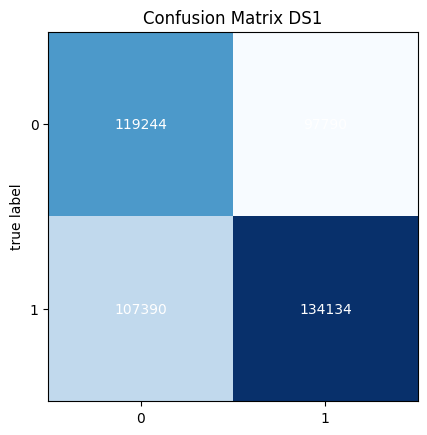

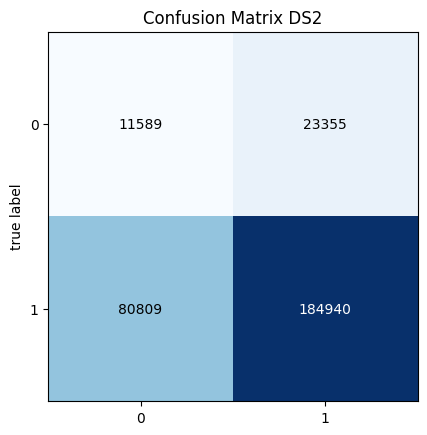

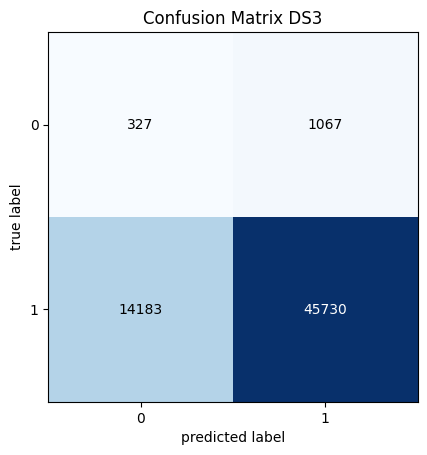

In [62]:
cm = confusion_matrix(os_true_y, np.round(os_y_hat_English_Dutch))
plot_confusion_matrix(conf_mat=cm)
plt.gca().xaxis.label.set_visible(False)
plt.title('Confusion Matrix DS1')

# Save plot
#plt.savefig('CONFmOSED')

cm = confusion_matrix(cc_true_y, np.round(cc_y_hat_English_Dutch))
plot_confusion_matrix(conf_mat=cm)
plt.gca().xaxis.label.set_visible(False)
plt.title('Confusion Matrix DS2')

# Save plot
#plt.savefig('CONFmCCED')

cm = confusion_matrix(true_fy, np.round(fy_hat_English_Dutch))
plot_confusion_matrix(conf_mat=cm)
plt.title('Confusion Matrix DS3')

# Save plot
#plt.savefig('CONFmFED')

plt.show()

In [64]:
# Create an array of just the majority class; 1
mjos = np.array([1] * len(os_y_hat))
mjcc = np.array([1] * len(cc_y_hat))
mjf = np.array([1] * len(fy_hat))

print('These are the scores if only 1 is predicted')
print('Precision:')
print('OpenSubtitles ',precision_score(os_true_y, mjos))
print('Cornell Corpus ',precision_score(cc_true_y, mjcc))
print('Friends Corpus ',precision_score(true_fy, mjf))

print('Recall')
print('OpenSubtitles ',recall_score(os_true_y, mjos))
print('Cornell Corpus ',recall_score(cc_true_y, mjcc))
print('Friends Corpus ',recall_score(true_fy, mjf))

print('Accuracy:')
print('OpenSubtitles ',accuracy_score(os_true_y, mjos))
print('Cornell Corpus ',accuracy_score(cc_true_y, mjcc))
print('Friends Corpus ',accuracy_score(true_fy, mjf))

print('F1')
print('OpenSubtitles ',f1_score(os_true_y, mjos))
print('Cornell Corpus ',f1_score(cc_true_y, mjcc))
print('Friends Corpus ',f1_score(true_fy, mjf))

print('Macro F1')
print('OpenSubtitles ',f1_score(os_true_y, mjos,average='weighted'))
print('Cornell Corpus ',f1_score(cc_true_y, mjcc,average='weighted'))
print('Friends Corpus ',f1_score(true_fy, mjf,average='weighted'))


These are the scores if only 1 is predicted
Precision:
OpenSubtitles  0.5267032741768762
Cornell Corpus  0.883788448683541
Friends Corpus  0.9772619766095225
Recall
OpenSubtitles  1.0
Cornell Corpus  1.0
Friends Corpus  1.0
Accuracy:
OpenSubtitles  0.5267032741768762
Cornell Corpus  0.883788448683541
Friends Corpus  0.9772619766095225
F1
OpenSubtitles  0.6899877442928114
Cornell Corpus  0.9383096592413698
Friends Corpus  0.9885002474839135
Macro F1
OpenSubtitles  0.36341880406094096
Cornell Corpus  0.8292672381257122
Friends Corpus  0.9660237057351315


In [ ]:
print("Macro F1 score OpenSubtitles ",f1_score(os_true_y, np.round(os_y_hat),average='weighted'))
print("Macro F1 score Dutch OpenSubtitles ",f1_score(os_true_y, np.round(os_y_hat_Dutch),average='weighted'))
print("Macro F1 score English-Dutch OpenSubtitles ",f1_score(os_true_y, np.round(os_y_hat_English_Dutch),average='weighted'))

print("Macro F1 score Cornell Corpus ",f1_score(cc_true_y, np.round(cc_y_hat),average='weighted'))
print("Macro F1 score Dutch Cornell Corpus ",f1_score(cc_true_y, np.round(cc_y_hat_Dutch),average='weighted'))
print("Macro F1 score English-Dutch Cornell Corpus ",f1_score(cc_true_y, np.round(cc_y_hat_English_Dutch),average='weighted'))

print("Macro F1 score Friends Corpuss ",f1_score(true_fy, np.round(fy_hat),average='weighted'))
print("Macro F1 score Dutch Friends Corpus ",f1_score(true_fy, np.round(fy_hat_Dutch),average='weighted'))
print("Macro F1 score English-Dutch Friends Corpus ",f1_score(true_fy, np.round(fy_hat_English_Dutch),average='weighted'))

Macro F1 score OpenSubtitles  0.561661422135163
Macro F1 score Dutch OpenSubtitles  0.5602809816952052
Macro F1 score English-Dutch OpenSubtitles  0.5528583676917986
Macro F1 score Cornell Corpus  0.6596993472031965
Macro F1 score Dutch Cornell Corpus  0.6435478670615643
Macro F1 score English-Dutch Cornell Corpus  0.7107414075335426
Macro F1 score Friends Corpuss  0.8316852454668815
Macro F1 score Dutch Friends Corpus  0.8246966674897432
Macro F1 score English-Dutch Friends Corpus  0.8385358176151756


#### Precision-Recall Curves

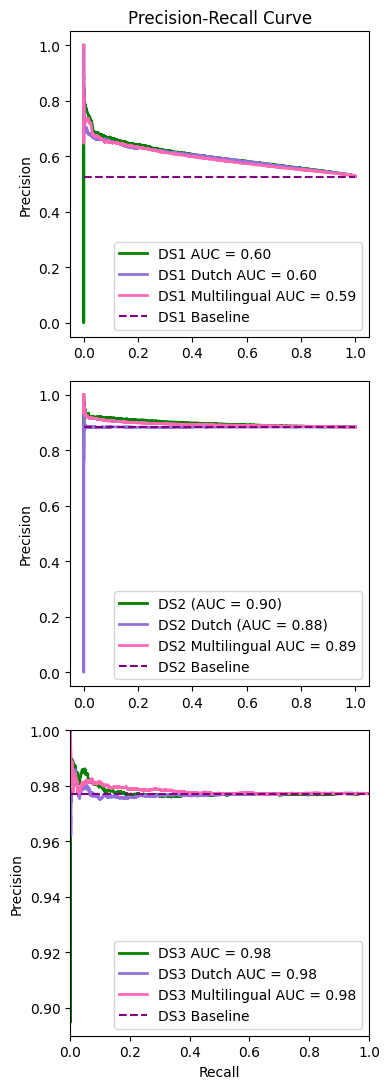

In [65]:
# Source: https://juandelacalle.medium.com/how-and-why-i-switched-from-the-roc-curve-to-the-precision-recall-curve-to-analyze-my-imbalanced-6171da91c6b8

fig, axis = plt.subplots(3,1,figsize=(4,11))

# On OpenSubtitles
os_precision, os_recall, _ = precision_recall_curve(os_true_y, os_y_hat)
os_pr_auc = average_precision_score(os_true_y, os_y_hat)
os_precision_Dutch, os_recall_Dutch, _ = precision_recall_curve(os_true_y, os_y_hat_Dutch)
os_pr_auc_Dutch = average_precision_score(os_true_y, os_y_hat_Dutch)
os_precision_English_Dutch, os_recall_English_Dutch, _ = precision_recall_curve(os_true_y, os_y_hat_English_Dutch)
os_pr_auc_English_Dutch = average_precision_score(os_true_y, os_y_hat_English_Dutch)

# Plot the Precision-Recall curve
axis[0].plot(os_recall, os_precision, color='green', lw=2, label='DS1 AUC = %0.2f' % os_pr_auc)
axis[0].plot(os_recall_Dutch, os_precision_Dutch, color='mediumpurple', lw=2, label='DS1 Dutch AUC = %0.2f' % os_pr_auc_Dutch)
axis[0].plot(os_recall_English_Dutch, os_precision_English_Dutch, color='hotpink', lw=2, label='DS1 Multilingual AUC = %0.2f' % os_pr_auc_English_Dutch)

baseline = len(np.where(os_true_y == 1)[1]) / len(os_true_y)
axis[0].plot([baseline,baseline], color='purple', linestyle='--', label='DS1 Baseline')

plt.xlim([0.0, 0.70])
axis[0].set_ylabel('Precision')
axis[0].set_title('Precision-Recall Curve')
axis[0].legend(loc="lower right")

# On Movies, Cornelle Corpus
cc_precision, cc_recall, _ = precision_recall_curve(cc_true_y, cc_y_hat)
cc_pr_auc = average_precision_score(cc_true_y, cc_y_hat)
cc_precision_Dutch, cc_recall_Dutch, _ = precision_recall_curve(cc_true_y, cc_y_hat_Dutch)
cc_pr_auc_Dutch = average_precision_score(cc_true_y, cc_y_hat_Dutch)
cc_precision_English_Dutch, cc_recall_English_Dutch, _ = precision_recall_curve(cc_true_y, cc_y_hat_English_Dutch)
cc_pr_auc_English_Dutch = average_precision_score(cc_true_y, cc_y_hat_English_Dutch)

# Plot the Precision-Recall curve
axis[1].plot(cc_recall, cc_precision, color='green', lw=2, label='DS2 (AUC = %0.2f)' % cc_pr_auc)
axis[1].plot(cc_recall_Dutch, cc_precision_Dutch, color='mediumpurple', lw=2, label='DS2 Dutch (AUC = %0.2f)' % cc_pr_auc_Dutch)
axis[1].plot(cc_recall_English_Dutch, cc_precision_English_Dutch, color='hotpink', lw=2, label='DS2 Multilingual AUC = %0.2f' % cc_pr_auc_English_Dutch)

baseline = len(np.where(cc_true_y == 1)[1]) / len(cc_true_y)
axis[1].plot([baseline,baseline], color='purple', linestyle='--', label='DS2 Baseline')

plt.xlim([0.0, 1.0])
axis[1].set_ylabel('Precision')
axis[1].legend(loc="lower right")

# On Friends
fy_precision, fy_recall, _ = precision_recall_curve(true_fy, fy_hat)
fy_pr_auc = average_precision_score(true_fy, fy_hat)
fy_precision_Dutch, fy_recall_Dutch, _ = precision_recall_curve(true_fy, fy_hat_Dutch)
fy_pr_auc_Dutch = average_precision_score(true_fy, fy_hat_Dutch)
fy_precision_English_Dutch, fy_recall_English_Dutch, _ = precision_recall_curve(true_fy, fy_hat_English_Dutch)
fy_pr_auc_English_Dutch = average_precision_score(true_fy, fy_hat_English_Dutch)

# Plot the Precision-Recall curve
axis[2].plot(fy_recall, fy_precision, color='green', lw=2, label='DS3 AUC = %0.2f' % fy_pr_auc)
axis[2].plot(fy_recall_Dutch, fy_precision_Dutch, color='mediumpurple', lw=2, label='DS3 Dutch AUC = %0.2f' % fy_pr_auc_Dutch)
axis[2].plot(fy_recall_English_Dutch, fy_precision_English_Dutch, color='hotpink', lw=2, label='DS3 Multilingual AUC = %0.2f' % fy_pr_auc_English_Dutch)

baseline = len(np.where(true_fy == 1)[1]) / len(true_fy)
axis[2].plot([baseline,baseline], color='purple',linestyle='--', label='DS3 Baseline')

axis[2].set_ylim([0.89,1.0])
axis[2].set_xlabel('Recall')
axis[2].set_ylabel('Precision')
axis[2].legend(loc="lower right")
plt.tight_layout()

# Save plot
#plt.savefig('wbaselineResultsPRs.png')